In [73]:
import sys 
sys.path.append('./src/')
from helper_for_assignment_2 import *
%matplotlib inline

# problem_1
Build a multimodal Gaussian distribution with synthetic data

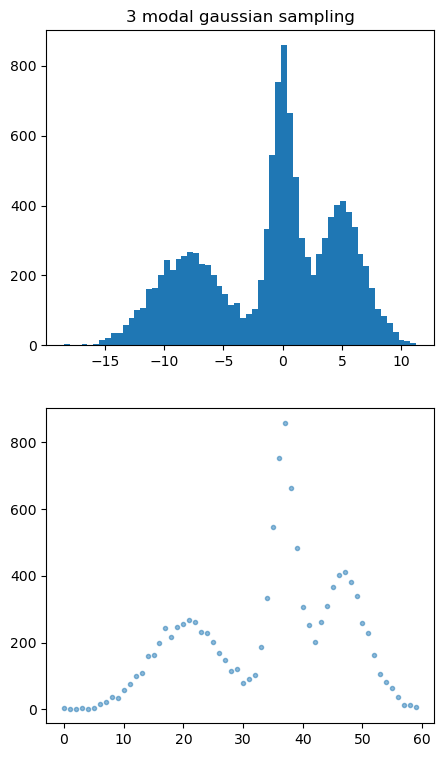

In [87]:
# in this case, I will use 3 gaussian for this case
# setting parameters
mu = [-8, 0, 5]
sd = [3, 1, 2]
size = 12000
bins = 60

# get sampling
gausian_sample = modal_gaussian_sampling(mu, sd, size)

# do the plot
plt.figure(figsize=(5, 9))

plt.subplot(2, 1, 1)
n, bins, patch = plt.hist(gausian_sample, bins=bins)
plt.title("3 modal gaussian sampling")

plt.subplot(2, 1, 2)
dummy_y = n
dummy_x = np.arange(len(n)).reshape((-1, 1))
plt.scatter(dummy_x, dummy_y, marker='.', alpha=0.5)

# problem_2
Construct a piecewise linear regression and plot the result with its splines 
and knots

In [88]:
from csv import list_dialects


class Piece_wise_regression:

    def __init__(self, n_knot:int, x:list, y:list):

        self.n_knot = n_knot
        self.knot_idx = []
        self.x = x 
        self.y = y
        self.train_x = [ [] for _ in range(self.n_knot + 1)]
        self.train_y = [ [] for _ in range(self.n_knot + 1)]

        self.best_knot_idx = [] 
        self.lowest_error = float('inf')


    # method
    def sample_knot(self):
        n_x = len(self.x)
        tmp = [randint(5, n_x-5) for _ in range(self.n_knot)]
        tmp.sort()
        self.knot_idx = tmp 

    def train_and_assess(self):
        
        self.sample_knot() 
        self.cut_the_training_data() 

        f_total = 0

        for t_x, t_y in zip(self.train_x, self.train_y):
            

            y_hat = self.lr_model(t_x, t_y)

            f_statistic, p_val = f_test(y_hat, t_y)

            f_total += f_statistic 
        
        return f_total
        
    def lr_model(self, t_x, t_y):

        m = LinearRegression()

        t_x = np.array(t_x).reshape((-1, 1))
        t_y = np.array(t_y).reshape((-1, 1))

        m.fit(t_x, t_y)

        return m.predict(t_x)
        
    def iter_train(self, n_iter:int):

        for _ in range(n_iter):

            try:
                f_statistic = self.train_and_assess()
            except Exception:
                print('pass')
                continue # if we cut the data in a bad way, just skip this iteration

            if f_statistic < self.lowest_error:
                self.lowest_error = f_statistic 
                self.best_knot_idx = self.knot_idx
                
        return self.best_knot_idx, self.lowest_error

    def cut_the_training_data(self):

        knot_idx_bin = [0] + self.knot_idx + [len(self.x)+1]

        for i in range(len(knot_idx_bin) - 1):

            l_idx = knot_idx_bin[i]
            r_idx = knot_idx_bin[i+1]

            self.train_x[i] = self.x[l_idx: r_idx]
            self.train_y[i] = self.y[l_idx: r_idx]
        
        return self.best_knot_idx, self.lowest_error

    # getter
    def get_knot_idx(self):
        return self.knot_idx

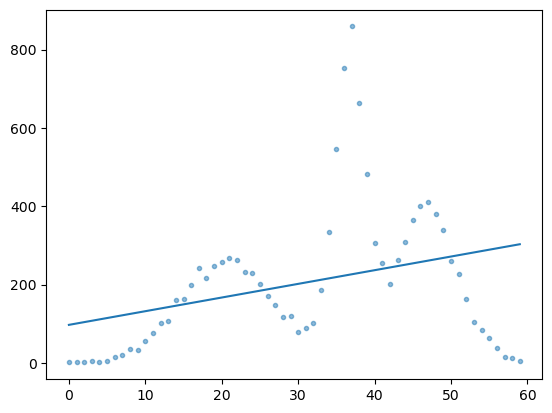

In [89]:
# let's do one knot firsta
m = LinearRegression()
m.fit(dummy_x, dummy_y)
y_hat = m.predict(dummy_x)

plt.plot(dummy_x, y_hat)

plt.scatter(dummy_x, dummy_y, marker='.', alpha=0.5)




# problem_3
Construct a piecewise polynomial regression and plot the result, its 
splines, and knots.

# problem_5
Try to model the multimodal Gaussian distribution built with single 
polynomial regression.

<ipython-input-79-e3c80a1d2aad>:5: RankWarning: Polyfit may be poorly conditioned
  plot_poly_regression(degree, dummy_y, fig_size=(8, 40))
<ipython-input-79-e3c80a1d2aad>:5: RankWarning: Polyfit may be poorly conditioned
  plot_poly_regression(degree, dummy_y, fig_size=(8, 40))


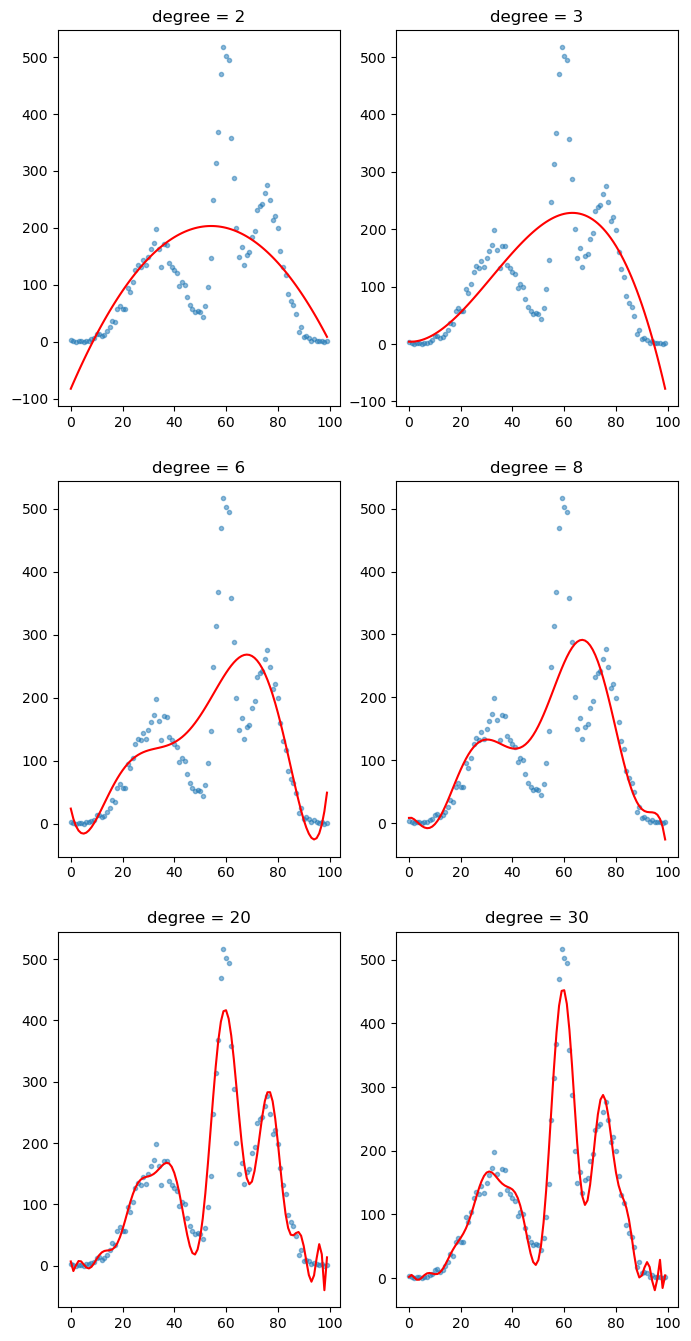

In [79]:
# define the degree
degree = [2, 3, 6, 8, 20, 30]

# plot them
plot_poly_regression(degree, dummy_y, fig_size=(8, 40))

# problem_6
Measure and report the execution time of tasks (2), task (3), and task 
(5).  Then report the differences in execution time (no plot required, but 
you need to report them in a table). Hint: use excel for table drawing and 
add it in the word file.

# problem_7
Use the Multimodal Gaussian distribution of Tasks 5, apply Ridge, 
LASSO and compare their accuracy and number of parameters, 
parameters coefficient with Polynomial regression. Here you should also 
report and discuss the differences (if there are any differences)